In [2]:
from random import randint
from time import sleep
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd
import numpy as np

# CODE SNIPPET FOR EXTRACTING DATA FROM 181 WEBPAGES OF LIBRARY JOURNAL WEBSITE USING BEAUTIFULSOUP

In [63]:
link="https://www.libraryjournal.com/section/technology?&page_number={}"
article_title_list=[]
published_date_list=[]
description_list=[]
for i in range(1,180,1):
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36'}
    html = requests.get(link.format(i),headers=headers)
    print('Page_Size', i)
    sleep(randint(1,5))
    bsobj = soup(html.content,'lxml')
    for article_title in bsobj.findAll('div',{'class':'col-md-9 col-sm-9 col-xs-8 article-headline pl_0 pr_0 mt_0'}):
        article_title_list.append(article_title.text.strip())
    for published_date in bsobj.findAll('div',{'class':'byline-detail col-sm-offset-0 pl_0 pr_0 mb_20'}):
        published_date_list.append((re.findall('\d{4}',published_date.text.strip())))
    for description in bsobj.findAll('div',{'class':'recommended-description mb_10'}):
        description_list.append(description.text.strip())

Page_Size 1
Page_Size 2
Page_Size 3
Page_Size 4
Page_Size 5
Page_Size 6
Page_Size 7
Page_Size 8
Page_Size 9
Page_Size 10
Page_Size 11
Page_Size 12
Page_Size 13
Page_Size 14
Page_Size 15
Page_Size 16
Page_Size 17
Page_Size 18
Page_Size 19
Page_Size 20
Page_Size 21
Page_Size 22
Page_Size 23
Page_Size 24
Page_Size 25
Page_Size 26
Page_Size 27
Page_Size 28
Page_Size 29
Page_Size 30
Page_Size 31
Page_Size 32
Page_Size 33
Page_Size 34
Page_Size 35
Page_Size 36
Page_Size 37
Page_Size 38
Page_Size 39
Page_Size 40
Page_Size 41
Page_Size 42
Page_Size 43
Page_Size 44
Page_Size 45
Page_Size 46
Page_Size 47
Page_Size 48
Page_Size 49
Page_Size 50
Page_Size 51
Page_Size 52
Page_Size 53
Page_Size 54
Page_Size 55
Page_Size 56
Page_Size 57
Page_Size 58
Page_Size 59
Page_Size 60
Page_Size 61
Page_Size 62
Page_Size 63
Page_Size 64
Page_Size 65
Page_Size 66
Page_Size 67
Page_Size 68
Page_Size 69
Page_Size 70
Page_Size 71
Page_Size 72
Page_Size 73
Page_Size 74
Page_Size 75
Page_Size 76
Page_Size 77
Page_Siz

In [64]:
article_title_df=pd.DataFrame({'Title': article_title_list})
published_year_df =pd.DataFrame({'Published_year': published_date_list})
description_df =pd.DataFrame({'Description': description_list})

In [66]:
removing_word = ["PREMIUM"]
new_article_title_df=article_title_df[~article_title_df.Title.str.contains('|'.join(removing_word))]

In [68]:
technology_article_df = pd.concat([new_article_title_df,published_year_df,description_df], axis="columns")
technology_article_df

,Title,Published_year,Description
0,Hiveclass Rolls Out Youth Sports Training Digi...,[2022],"Hiveclass, a startup company building a “digit..."
1,Academic Movers Q&A: Elisandro Cabada on Using...,[2022],Elisandro Cabada has worn many hats during his...
5,Digital Literacy: Skills & Strategies,[],The National Digital Inclusion Alliance (NDIA)...
6,Brooklyn’s Books Unbanned Continues to Grow,[2022],"On August 25, the White House Office of Scienc..."
7,Beyond Collections: How Some Libraries are See...,[2022],Higher ed nonprofit ITHAKA announced on August...
...,...,...,...
272,NaN,[2018],Following more than a year of preparation and ...
273,NaN,[2018],"What’s hot, what’s not, and how much does it c..."
275,NaN,[2018],"Sterling Heights Public Library, MI, has been ..."
368,NaN,[],The University of Michigan Library (UM) has la...


In [69]:
new_technology_article_df=technology_article_df.dropna()

In [73]:
new_technology_article_df

,Title,Published_year,Description
0,Hiveclass Rolls Out Youth Sports Training Digi...,[2022],"Hiveclass, a startup company building a “digit..."
1,Academic Movers Q&A: Elisandro Cabada on Using...,[2022],Elisandro Cabada has worn many hats during his...
5,Digital Literacy: Skills & Strategies,[],The National Digital Inclusion Alliance (NDIA)...
6,Brooklyn’s Books Unbanned Continues to Grow,[2022],"On August 25, the White House Office of Scienc..."
7,Beyond Collections: How Some Libraries are See...,[2022],Higher ed nonprofit ITHAKA announced on August...
...,...,...,...
1581,Podcast 1 2 3,[2007],
1582,Podcast 1 2 3,[2007],
1583,"Google Scan Plan Expands, Gaining the 12 CIC U...",[2007],
1584,"Google Scan Plan Expands, Gaining the 12 CIC U...",[2007],


# TRANSFORMING DATA INTO STANDARD FORMAT APPLICABLE FOR TEXT PROCESSING AND ANALYZING

In [145]:
import re
from cleantext import clean
new_article_title_list_1=[]
new_published_date_list=[]
new_description_list=[]
for title in article_title_list:
    a=re.sub('[”|“|!|@|.|$|*|&|,|"|"|(|)|\n|:|-]|[|\|/|;|-|’]','',title)
    new_article_title_list_1.append(a.strip())
for year in published_date_list:
    year=clean(year, no_emoji=True)
    a=re.sub("\[|\]|'",'',year)
    new_published_date_list.append(a.strip())
for description in description_list:
    a=re.sub('[”|“|!|@|.|$|*|&|,|"|"|(|)|\n|:|-]|[|\|/|;|-|’]','',description)
    new_description_list.append(a.strip())

In [147]:
new_article_title_df_1=pd.DataFrame({'Title': new_article_title_list_1})
new_published_year_df =pd.DataFrame({'Published_year': new_published_date_list})
new_description_df =pd.DataFrame({'Description': new_description_list})
new_technology_article_df = pd.concat([new_article_title_df_1,new_published_year_df,new_description_df], axis="columns")
new_technology_article_df

,Title,Published_year,Description
0,Hiveclass Rolls Out Youth Sports Training Digi...,2022,Hiveclass a startup company building a digital...
1,Academic Movers QA Elisandro Cabada on Using T...,2022,Elisandro Cabada has worn many hats during his...
2,PREMIUMAstrotopia The Dangerous Religion of th...,,Since April Brooklyn Public Librarys BPL Books...
3,PREMIUMComputing Taste Algorithms and the Make...,,If youre only concerned with basic collection ...
4,PREMIUMWriting the Revolution Wikipedia and th...,,A growing number of libraries are beginning to...
...,...,...,...
1606,Online Databases Trends from the Industry Per...,2002,NaN
1607,Online Databases Sorting Through Online Systems,2002,NaN
1608,Online Databases Ingenta Grows in the US Market,2002,NaN
1609,Online Databases Information Today Stands Alone,2002,NaN


In [148]:
removing_word = ["PREMIUM"]
new_new_article_title_df=new_technology_article_df[~new_technology_article_df.Title.str.contains('|'.join(removing_word))]

In [149]:
new_new_article_title_df.dropna()

,Title,Published_year,Description
0,Hiveclass Rolls Out Youth Sports Training Digi...,2022,Hiveclass a startup company building a digital...
1,Academic Movers QA Elisandro Cabada on Using T...,2022,Elisandro Cabada has worn many hats during his...
5,Digital Literacy Skills Strategies,,The National Digital Inclusion Alliance NDIA i...
6,Brooklyns Books Unbanned Continues to Grow,2022,On August 25 the White House Office of Science...
7,Beyond Collections How Some Libraries are Seei...,2022,Higher ed nonprofit ITHAKA announced on August...
...,...,...,...
1581,Podcast 1 2 3,2007,
1582,Podcast 1 2 3,2007,
1583,Google Scan Plan Expands Gaining the 12 CIC Un...,2007,
1584,Google Scan Plan Expands Gaining the 12 CIC Un...,2007,


# REMOVING BLANK VALUES FROM THE DATAFRAME

In [150]:
new_new_article_title_df['Description'].replace('', np.nan, inplace=True)

/var/folders/vr/4jm_c5vs5lv8kkdxq_94qdw40000gn/T/ipykernel_12167/4065824332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_new_article_title_df['Description'].replace('', np.nan, inplace=True)


In [151]:
new_new_article_title_df['Published_year'].replace('', np.nan, inplace=True)

/var/folders/vr/4jm_c5vs5lv8kkdxq_94qdw40000gn/T/ipykernel_12167/1719285155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_new_article_title_df['Published_year'].replace('', np.nan, inplace=True)


In [152]:
new_new_article_title_df['Title'].replace('', np.nan, inplace=True)

/var/folders/vr/4jm_c5vs5lv8kkdxq_94qdw40000gn/T/ipykernel_12167/111278619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_new_article_title_df['Title'].replace('', np.nan, inplace=True)


In [153]:
df=new_new_article_title_df.dropna()

In [193]:
df

,Title,Published_year,Description
0,Hiveclass Rolls Out Youth Sports Training Digi...,2022,Hiveclass a startup company building a digital...
1,Academic Movers QA Elisandro Cabada on Using T...,2022,Elisandro Cabada has worn many hats during his...
6,Brooklyns Books Unbanned Continues to Grow,2022,On August 25 the White House Office of Science...
7,Beyond Collections How Some Libraries are Seei...,2022,Higher ed nonprofit ITHAKA announced on August...
8,Open for Growth Open Source Platforms on the Rise,2022,The Las Vegas–Clark County Library District in...
...,...,...,...
1092,Library of Congress Posts Twitter Updates on T...,2011,Amanda Hocking ebooks have recently been made ...
1094,OCLC App Makes Connections,2011,Just a few months after the merger of the Proj...
1095,EBSCO Publishing Integrates 300K Ebooks and Au...,2011,That this is a boon for OverDrive is clear but...
1106,Unlocking HathiTrust Inside the Librarians' Di...,2011,The day that library patrons can download and ...


# DATA TYPE CHANGES FOR DATA VISUALIZATION

In [154]:
df = df.astype({"Published_year": int})

<AxesSubplot:>

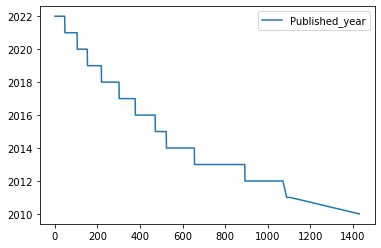

In [155]:
df.plot()

# NATURAL LANGUAGE PROCESSING FOR TEXT PROCESSING 

In [156]:
import nltk
from nltk import word_tokenize, Text
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [157]:
word_list=[]
consolidated_description=' '.join(new_description_list)
lem=WordNetLemmatizer()
lem_tokens=lem.lemmatize(consolidated_description.lower())
file_tokens = word_tokenize(lem_tokens)
for i in file_tokens:
    if len(i)>7:
        word_list.append(i)
data_count = nltk.FreqDist(word_list)
print(data_count.most_common(10))

[('libraries', 571), ('services', 151), ('university', 150), ('announced', 148), ('technology', 137), ('information', 129), ('librarians', 112), ('academic', 98), ('available', 95), ('research', 94)]


In [158]:
pos_tagged_set=nltk.pos_tag(file_tokens,tagset='universal')
pos_tagged_set[:10]

[('hiveclass', 'NOUN'),
 ('a', 'DET'),
 ('startup', 'NOUN'),
 ('company', 'NOUN'),
 ('building', 'VERB'),
 ('a', 'DET'),
 ('digital', 'ADJ'),
 ('encyclopedia', 'NOUN'),
 ('of', 'ADP'),
 ('youth', 'NOUN')]

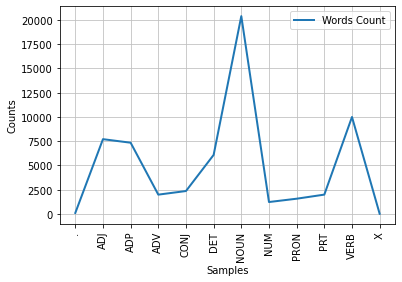

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [159]:
complete_set=[]
Pos_tag_map=[('Words Count',j[1]) for j in pos_tagged_set]
complete_set.extend(Pos_tag_map)
common_pos=nltk.ConditionalFreqDist(complete_set)
common_pos.plot()

In [160]:
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
stop_words = set(stopwords.words('english'))

In [194]:
print(stop_words)

{'shouldn', 'few', 'them', 'an', 'o', "that'll", 'until', 'she', 'being', 'where', 'have', 'after', 'only', 'couldn', 'own', 'no', 'won', 'too', 'not', 'am', 'and', 're', 'down', "hadn't", "should've", 'doing', "you're", 'as', "mustn't", 'did', 'shan', 'which', 'by', 'yourselves', 'both', 'its', 'our', 'i', 'on', 'with', 'most', 'we', "wouldn't", "doesn't", 'here', 'more', 'having', 'her', 'further', 'why', 'his', "don't", 't', 'aren', "mightn't", 'over', 'any', "needn't", 'how', 'is', 'doesn', 'hasn', 'just', 'each', 'himself', 'ain', "shan't", 'through', 'from', 'nor', 'herself', "you've", "weren't", 'does', 'now', 'than', 'yours', 'itself', 'when', 'myself', 'your', 'off', 'again', 'under', 'once', "didn't", 'be', 'in', 'same', 'do', 'wouldn', "shouldn't", 'out', 'yourself', "you'd", 'some', 'are', 'a', 'at', 'so', 'hers', 'isn', 'don', 'then', 'ours', 'd', 'they', 's', "haven't", 'has', 'for', 'there', 'their', "hasn't", 'should', 'it', 'below', "isn't", 'was', 'whom', 'needn', 'ca

In [161]:
filtered_list=[]
for words in file_tokens:
    if words not in stop_words:
        filtered_list.append(words)
filtered_stop_words_text=' '.join(filtered_list)
print(filtered_stop_words_text)

hiveclass startup company building digital encyclopedia youth sports training partnering libraries throughout united states offer teens youth access mobilefriendly database professionally shot athleteled instructional videos soccer basketball tennis dance selfdefense volleyball elisandro cabada worn many hats career university illinois urbanachampaign assistant professor university library interim head mathematics library 3d printing project coordinator among others commitment developing using technology library service outreach 2022 movers shakers award library journal recently reached learn innovative work since april brooklyn public librarys bpl books unbanned program offered free library cards teens young adults across united states live communities impacted book bans enabling access librarys collection 500000 ebooks eaudiobooks digital magazines bpl chief librarian nick higgins recently talked lj idea program originated grown past six months youre concerned basic collection manage

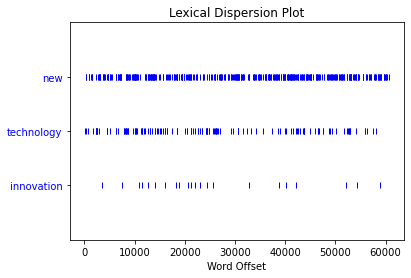

In [162]:
%matplotlib inline
from nltk import word_tokenize, Text
text = Text(file_tokens)
text.dispersion_plot(['new','technology','innovation'])

In [163]:
from nltk import FreqDist
filtered_lem_tokens=lem.lemmatize(filtered_stop_words_text.lower())
filtered_file_tokens = word_tokenize(filtered_lem_tokens)
filtered_text = Text(filtered_file_tokens)
Frequency_distribution = FreqDist(filtered_text)
Frequency_distribution.most_common(10)

[('library', 977),
 ('libraries', 571),
 ('new', 382),
 ('public', 325),
 ('digital', 294),
 ('access', 178),
 ('ebook', 165),
 ('ebooks', 155),
 ('services', 151),
 ('university', 150)]

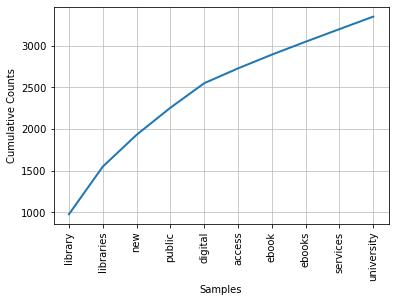

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [164]:
Frequency_distribution.plot(10, cumulative=True)

In [196]:
stopwords=STOPWORDS
review_word_cloud= WordCloud(background_color='white', stopwords = stopwords, height=1000,width=1000)
review_word_cloud.generate(filtered_stop_words_text)
review_word_cloud.to_file('whole_article_description.png')

In [239]:
siao=SentimentIntensityAnalyzer()
siao.polarity_scores(filtered_stop_words_text)

{'neg': 0.027, 'neu': 0.836, 'pos': 0.137, 'compound': 1.0}

In [241]:
result_dict={}
for i,row in tqdm(df.iterrows(),  total=len(df)):
    review=row['Description']
    name=row['Published_year']
    result_dict[name]=siao.polarity_scores(review)

  0%|          | 0/964 [00:00<?, ?it/s]

In [242]:
review_sentiment_df=pd.DataFrame(result_dict).T

In [243]:
review_sentiment_df

,neg,neu,pos,compound
2022,0.000,0.762,0.238,0.6486
2021,0.000,0.960,0.040,0.2500
2020,0.000,1.000,0.000,0.0000
2019,0.000,0.596,0.404,0.6249
2018,0.000,0.971,0.029,0.3182
2017,0.000,0.874,0.126,0.6808
2016,0.020,0.884,0.095,0.7717
2015,0.049,0.848,0.103,0.8100
2014,0.037,0.863,0.100,0.3925
2013,0.000,0.825,0.175,0.8993


# USING PYTHON WITH SQL FOR FILTERING DATA BASED ON THE PUBLISHED YEAR COLUMN

In [168]:
import sqlite3 as sql

In [169]:
conn = sql.connect('default.db')

In [170]:
df.to_sql('sql_table', conn)

964

In [171]:
df

,Title,Published_year,Description
0,Hiveclass Rolls Out Youth Sports Training Digi...,2022,Hiveclass a startup company building a digital...
1,Academic Movers QA Elisandro Cabada on Using T...,2022,Elisandro Cabada has worn many hats during his...
6,Brooklyns Books Unbanned Continues to Grow,2022,On August 25 the White House Office of Science...
7,Beyond Collections How Some Libraries are Seei...,2022,Higher ed nonprofit ITHAKA announced on August...
8,Open for Growth Open Source Platforms on the Rise,2022,The Las Vegas–Clark County Library District in...
...,...,...,...
1092,Library of Congress Posts Twitter Updates on T...,2011,Amanda Hocking ebooks have recently been made ...
1094,OCLC App Makes Connections,2011,Just a few months after the merger of the Proj...
1095,EBSCO Publishing Integrates 300K Ebooks and Au...,2011,That this is a boon for OverDrive is clear but...
1106,Unlocking HathiTrust Inside the Librarians' Di...,2011,The day that library patrons can download and ...


# Description Analysis for 2022

In [172]:
query = 'select * from sql_table where Published_year ="2022"'
articles_2022 = pd.read_sql(query, conn)

In [198]:
articles_2022.describe()

,index,Published_year
count,36.000000,36.0
mean,25.638889,2022.0
std,13.794725,0.0
min,0.000000,2022.0
25%,14.250000,2022.0
50%,28.500000,2022.0
75%,37.250000,2022.0
max,46.000000,2022.0


In [174]:
description_2022=[]
description_2022 = articles_2022['Description'].values.tolist()

In [175]:
description_2022_text=' '.join(description_2022)

In [230]:
word_list=[]
consolidated_description=' '.join(description_2022)
lem=WordNetLemmatizer()
lem_tokens=lem.lemmatize(consolidated_description.lower())
file_tokens = word_tokenize(lem_tokens)
for i in file_tokens:
    if len(i)>7:
        word_list.append(i)
data_count = nltk.FreqDist(word_list)
print(data_count.most_common(10))

[('libraries', 21), ('librarians', 10), ('university', 7), ('technology', 7), ('research', 7), ('maryland', 7), ('collections', 6), ('association', 6), ('available', 5), ('district', 5)]


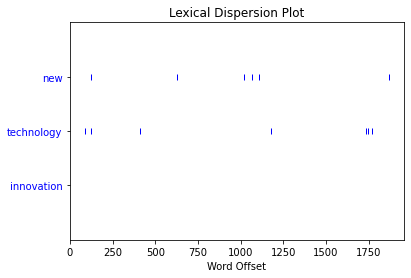

In [231]:
%matplotlib inline
from nltk import word_tokenize, Text
text = Text(file_tokens)
text.dispersion_plot(['new','technology','innovation'])

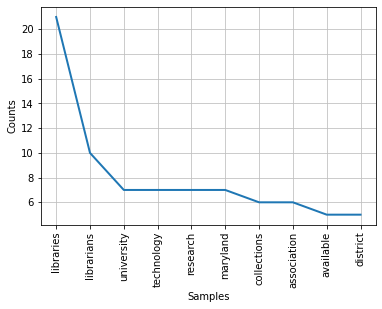

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [200]:
data_count.plot(10)

In [229]:
stopwords=STOPWORDS
review_word_cloud= WordCloud(background_color='white', stopwords = stopwords, height=1000,width=1000)
review_word_cloud.generate(description_2022_text)
review_word_cloud.to_file('2022_article_description.png')

# Description Analysis for 2021

In [201]:
query = 'select * from sql_table where Published_year ="2021"'
articles_2021 = pd.read_sql(query, conn)

In [202]:
articles_2021.describe()

,index,Published_year
count,55.000000,55.0
mean,75.418182,2021.0
std,17.284858,0.0
min,47.000000,2021.0
25%,60.500000,2021.0
50%,75.000000,2021.0
75%,90.500000,2021.0
max,104.000000,2021.0


In [203]:
description_2021=[]
description_2021 = articles_2021['Description'].values.tolist()

In [244]:
description_2021_text=' '.join(description_2021)

In [247]:
stopwords=STOPWORDS
review_word_cloud= WordCloud(background_color='white', stopwords = stopwords, height=1000,width=1000)
review_word_cloud.generate(description_2021_text)
review_word_cloud.to_file('2021_article_description.png')

In [232]:
word_list=[]
consolidated_description=' '.join(description_2021)
lem=WordNetLemmatizer()
lem_tokens=lem.lemmatize(consolidated_description.lower())
file_tokens = word_tokenize(lem_tokens)
for i in file_tokens:
    if len(i)>7:
        word_list.append(i)
data_count = nltk.FreqDist(word_list)
print(data_count.most_common(10))

[('libraries', 40), ('services', 11), ('information', 10), ('pandemic', 10), ('university', 10), ('announced', 9), ('american', 9), ('learning', 8), ('broadband', 8), ('technology', 7)]


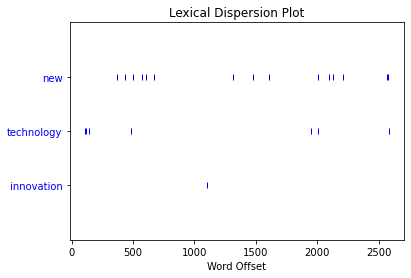

In [233]:
%matplotlib inline
from nltk import word_tokenize, Text
text = Text(file_tokens)
text.dispersion_plot(['new','technology','innovation'])

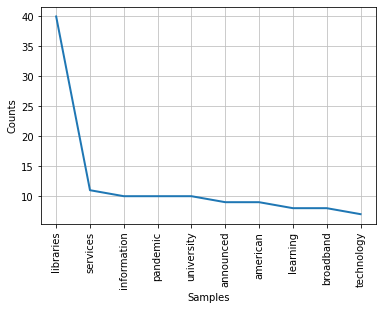

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [205]:
data_count.plot(10)

# Description Analysis for 2020

In [207]:
query = 'select * from sql_table where Published_year ="2020"'
articles_2020 = pd.read_sql(query, conn)

In [208]:
articles_2020.describe()

,index,Published_year
count,45.000000,45.0
mean,127.377778,2020.0
std,13.688563,0.0
min,105.000000,2020.0
25%,116.000000,2020.0
50%,127.000000,2020.0
75%,138.000000,2020.0
max,152.000000,2020.0


In [209]:
description_2020=[]
description_2020 = articles_2020['Description'].values.tolist()

In [245]:
description_2020_text=' '.join(description_2020)

In [248]:
stopwords=STOPWORDS
review_word_cloud= WordCloud(background_color='white', stopwords = stopwords, height=1000,width=1000)
review_word_cloud.generate(description_2020_text)
review_word_cloud.to_file('2020_article_description.png')

In [234]:
word_list=[]
consolidated_description=' '.join(description_2020)
lem=WordNetLemmatizer()
lem_tokens=lem.lemmatize(consolidated_description.lower())
file_tokens = word_tokenize(lem_tokens)
for i in file_tokens:
    if len(i)>7:
        word_list.append(i)
data_count = nltk.FreqDist(word_list)
print(data_count.most_common(10))

[('libraries', 24), ('pandemic', 8), ('announced', 7), ('macmillan', 5), ('publishing', 5), ('offering', 4), ('publishers', 4), ('services', 4), ('personal', 4), ('analytics', 4)]


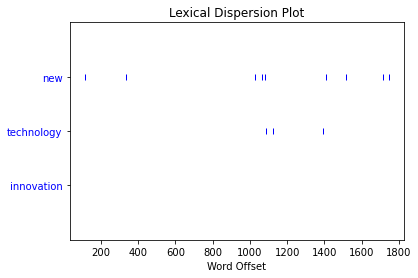

In [235]:
%matplotlib inline
from nltk import word_tokenize, Text
text = Text(file_tokens)
text.dispersion_plot(['new','technology','innovation'])

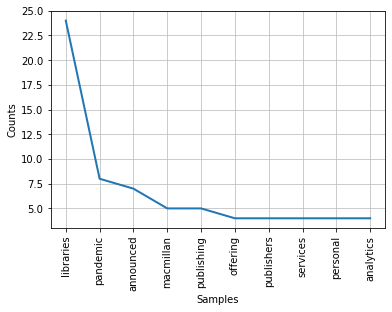

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [211]:
data_count.plot(10)

# Description Analysis for 2019

In [223]:
query = 'select * from sql_table where Published_year ="2019"'
articles_2019 = pd.read_sql(query, conn)

In [224]:
articles_2019.describe()

,index,Published_year
count,59.000000,59.0
mean,187.135593,2019.0
std,19.376005,0.0
min,153.000000,2019.0
25%,171.500000,2019.0
50%,189.000000,2019.0
75%,203.500000,2019.0
max,218.000000,2019.0


In [226]:
description_2019=[]
description_2019 = articles_2019['Description'].values.tolist()

In [246]:
description_2019_text=' '.join(description_2019)

In [249]:
stopwords=STOPWORDS
review_word_cloud= WordCloud(background_color='white', stopwords = stopwords, height=1000,width=1000)
review_word_cloud.generate(description_2019_text)
review_word_cloud.to_file('2019_article_description.png')

In [236]:
word_list=[]
consolidated_description=' '.join(description_2019)
lem=WordNetLemmatizer()
lem_tokens=lem.lemmatize(consolidated_description.lower())
file_tokens = word_tokenize(lem_tokens)
for i in file_tokens:
    if len(i)>7:
        word_list.append(i)
data_count = nltk.FreqDist(word_list)
print(data_count.most_common(10))

[('libraries', 23), ('academic', 16), ('announced', 9), ('launched', 9), ('research', 9), ('information', 8), ('librarians', 8), ('university', 7), ('students', 7), ('technology', 7)]


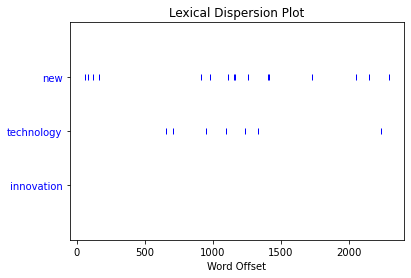

In [237]:
%matplotlib inline
from nltk import word_tokenize, Text
text = Text(file_tokens)
text.dispersion_plot(['new','technology','innovation'])

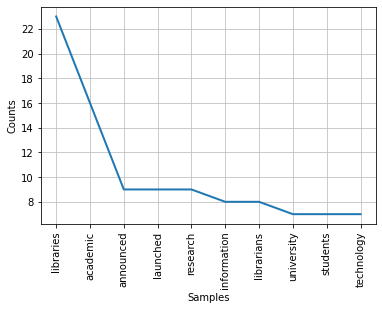

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [228]:
data_count.plot(10)